## Árvores de Decisão - Iris dataset

### 1. Importando bibliotecas

In [40]:
# Dataset Iris
from sklearn.datasets import load_iris

# Manipulação de dados
import pandas as pd
import numpy as np

# Treino e teste
from sklearn.model_selection import train_test_split

# Árvores de decisão
from sklearn import tree
## Visualização da árvore
from sklearn.tree import export_graphviz
import pydot
import graphviz
from ipywidgets import interactive
## Árvore interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source                   

# Metricas de validação
from sklearn import metrics

### 2. Carregando as bases de dados

In [3]:
df = load_iris()
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 3. Verificando os features_names, target e data

In [4]:
# Nomes das features
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Classes de saída
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Dataset
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 4. Dividindo os dados em treino e test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

### 5. Classificador

In [11]:
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha

### 6. Treinando o modelo de árvore de decisão

In [12]:
clf = clf.fit(X_train, y_train)

In [17]:
# Importância das features para o modelo treinado
clf.feature_importances_

array([0.        , 0.02158717, 0.41735197, 0.56106086])

In [19]:
for feature, importance in zip(df.feature_names, clf.feature_importances_):
    print('{}: {}'.format(feature, importance))

sepal length (cm): 0.0
sepal width (cm): 0.02158717105263158
petal length (cm): 0.41735197368421056
petal width (cm): 0.5610608552631577


### 7. Testando o modelo

In [20]:
predito = clf.predict(X_test)
predito

array([2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2,
       2])

In [26]:
# Testando com uma nova amostra
test = np.array([[5.1, 3.5, 1.4, 0.2]])
df.target_names[clf.predict(test)]

array(['setosa'], dtype='<U10')

In [27]:
# Verificando a probabilidade do resultado
clf.predict_proba(test)

array([[1., 0., 0.]])

### 8. Validação do Modelo

In [31]:
print(metrics.classification_report(y_test, predito, target_names = df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.94      0.89      0.91        18
   virginica       0.89      0.94      0.92        18

   micro avg       0.93      0.93      0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [32]:
metrics.accuracy_score(y_test, predito)

0.9333333333333333

### 9. Visualizando a árvore

In [37]:
# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/edubr/Anaconda3/envs/data-science/Library/bin/graphviz/'

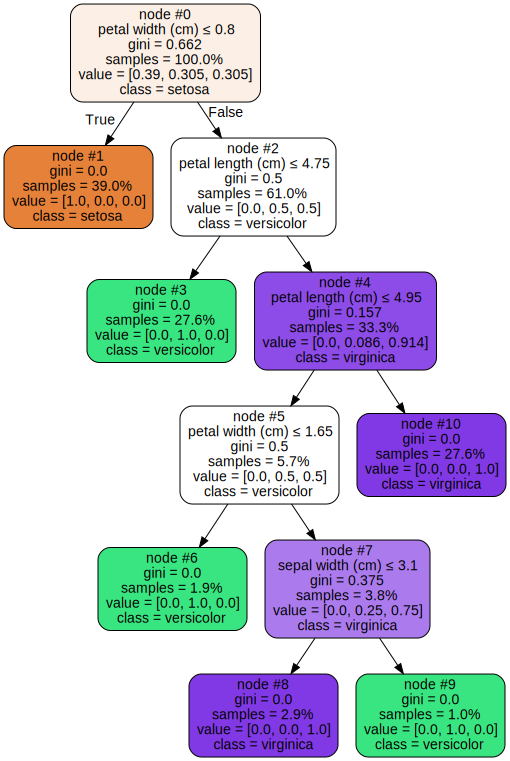

In [38]:
dot_data = tree.export_graphviz(
         clf, 
         out_file=None,
         feature_names=df.feature_names,
         class_names=df.target_names,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

### 10. Árvore interativa

In [41]:
# load dataset
data = load_iris()

# feature matrix
X = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

# class label
class_label = data.target_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf
    )

    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…